# **Final Project Data Science**

**@KelasWork**

*Shahrizal M*




Source: [Quora](https://www.quora.com/What-is-a-simple-explanation-of-a-recurrent-neural-network)
<img src="https://cdn-images-1.medium.com/max/1600/1*NKhwsOYNUT5xU7Pyf6Znhg.png">

Source: [Medium](https://medium.com/ai-journal/lstm-gru-recurrent-neural-networks-81fe2bcdf1f9)

https://www.youtube.com/watch?v=UNmqTiOnRfg&t=3s

**RNN** atau singkatan dari ***recurrent neural network*** ialah arsitektur jaringan saraf tiruan yang prosesnya dipanggil secara berulang-ulang untuk input data yang sifatnya *sekuensial.*
RNN ini termasuk dalam bagian *Deep Learning* yang terinspirasi dari struktur dan fungsi otak manusia.

**LSTM** merupakan singkatan dari ***long short term memory*** dan merupakan bagian dari RNN yang ternyata memiliki modifikasi berupa adanya tanbahan *memowy cell* untuk menyimpan informasi atau data yang kurun.

LSTM sangat cocok untuk menangani masalah *vanishing gradient* pada RNN saat proses data sequensial yang banyak dan panjang.

# Import Modul

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
color_pal = sns.color_palette()
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
import datetime


# Import library keras yang diperlukan
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,  GRU
import math
from sklearn.metrics import mean_squared_error

# Pra-Pemrosesan Data

**Exploratory Data Analysis (EDA)**

Plot data untuk keseluruhan waktu ke waktu (2006 - 2018).

In [ ]:
# Fungsi Tambahan untuk visualisasi elegan
def prediction_plot(test,predicted):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set(title="Amazon Stock (Close) Price")
    ax.plot(dates, test, color="r")
    ax.plot(dates, predicted, color="b")
    plt.legend(["Data Riil","Prediksi"])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.show()

# Fungsi untuk evaluasi model dengan RMSE
def rmse_eval(test,predicted):
    rmse = math.sqrt(mean_squared_error(test,predicted))
    print("The root mean squared error is {}.".format(rmse))

# Load Data

**Tren Data**


Ketahui bentuk dari tren data timeseries, seasonality atau yang lain, beserta Outlier

In [ ]:
# Import Dataset
df= pd.read_csv("/content/AMZN_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date']) #import dataset based on your directory
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN
...,...,...,...,...,...,...
2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN
2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN
2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN


In [ ]:
df = df.drop(['Open', 'High', 'Low', 'Volume', 'Name'], axis=1)

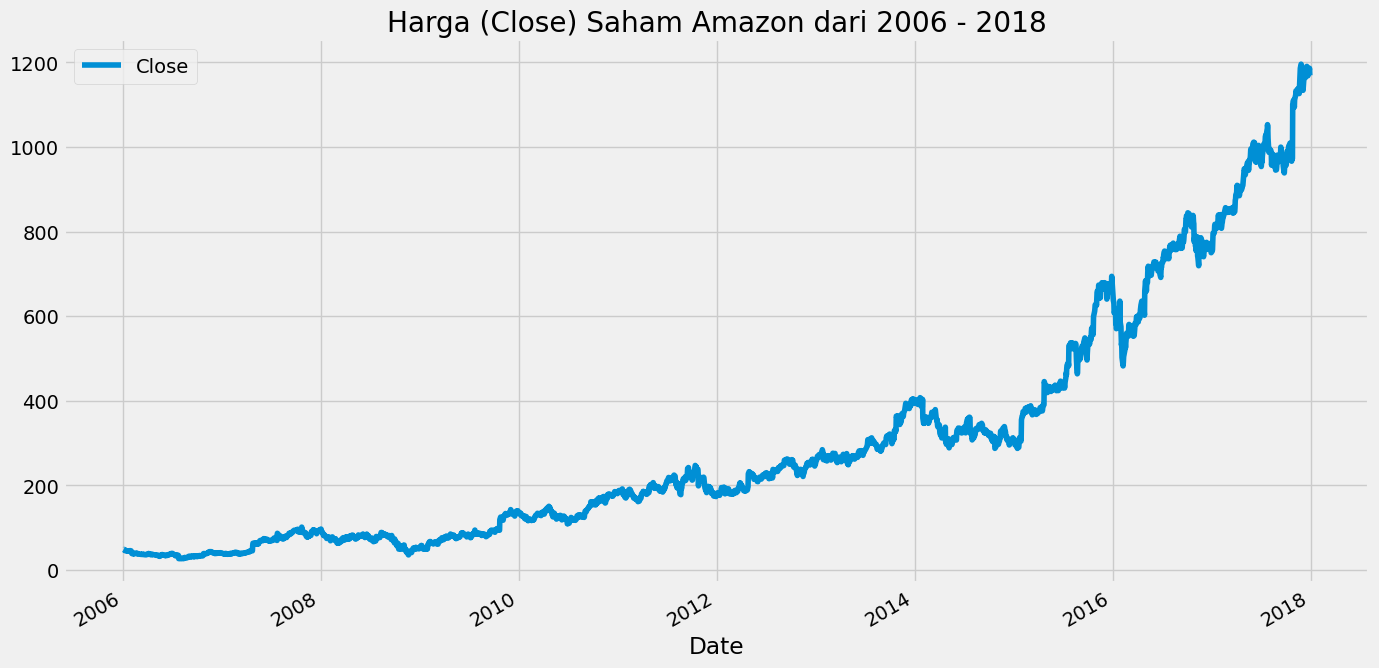

In [ ]:
df.plot(style='',
        figsize=(15,8),
        color=color_pal[0],
        title='Harga (Close) Saham Amazon dari 2006 - 2018')
plt.show()

In [ ]:
# Membuat fitur timeseries
def fitur(df):
  df = df.copy()
  df['Hari per Minggu'] = df.index.dayofweek
  df['Quartal'] = df.index.quarter
  df['Bulan'] = df.index.month
  df['Tahun'] = df.index.year
  df['Hari'] = df.index.dayofyear
  df['Hari per Bulan'] = df.index.day
  df['Minggu per Tahun'] = df.index.isocalendar().week
  return(df)

df = fitur(df)

<ipython-input-244-862324b22e3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Quartal', y='Close', palette='Blues')


Text(0.5, 1.0, 'Harga Saham Amazon (Close Price) Per Quartal dari tahun 2006 - 2018')

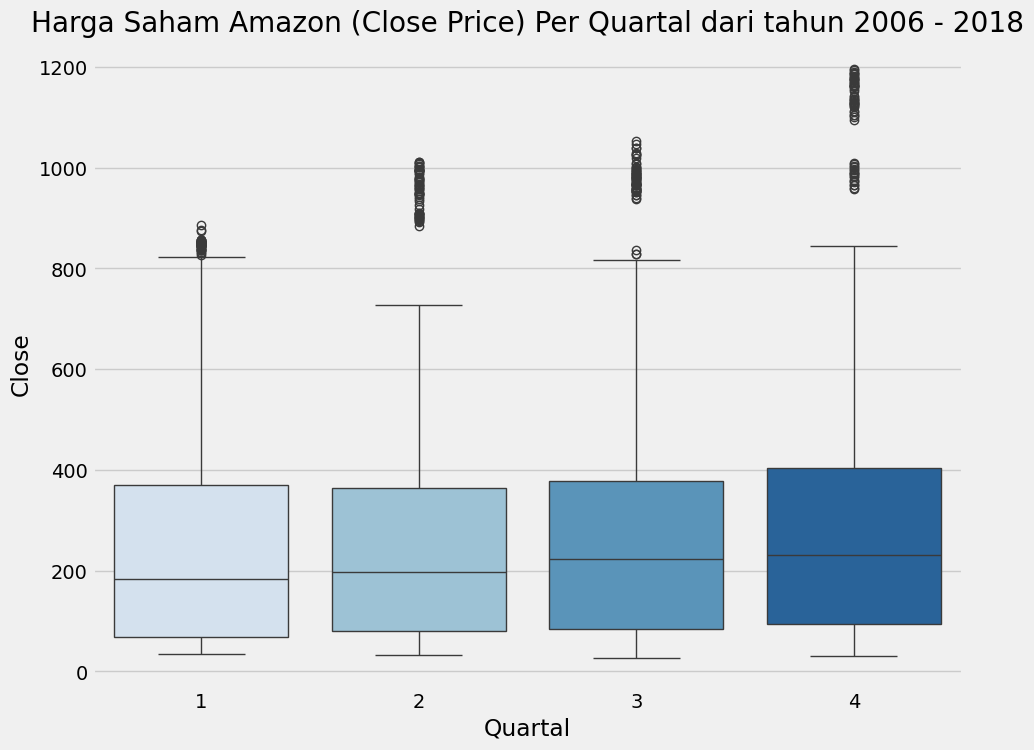

In [ ]:
# visualisasi plot (Quartal)
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='Quartal', y='Close', palette='Blues')
ax.set_title('Harga Saham Amazon (Close Price) Per Quartal dari tahun 2006 - 2018')

<ipython-input-245-2a15f0d8cfac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Bulan', y='Close', palette='Greens')


Text(0.5, 1.0, 'Harga Saham Amazon (Close Price) Per Bulan dari tahun 2006 - 2018')

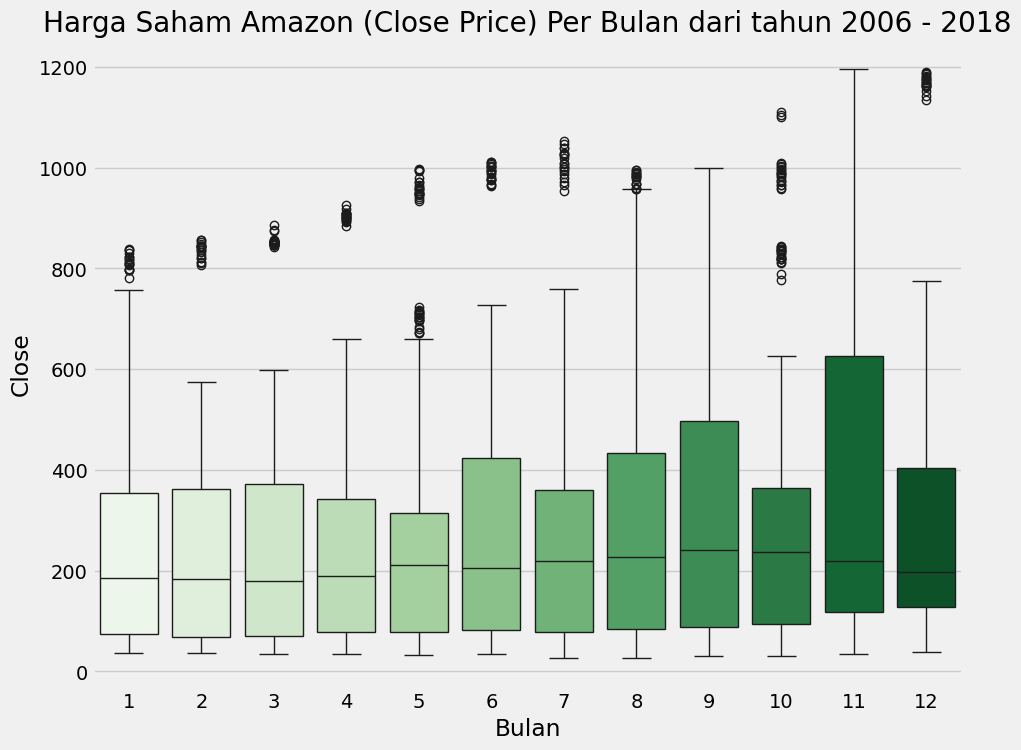

In [ ]:
# visualisasi plot (Bulan)
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='Bulan', y='Close', palette='Greens')
ax.set_title('Harga Saham Amazon (Close Price) Per Bulan dari tahun 2006 - 2018')

<ipython-input-246-02e35945b9a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Tahun', y='Close', palette='Reds')


Text(0.5, 1.0, 'Harga Saham Amazon (Close Price) Per Bulan dari tahun 2006 - 2018')

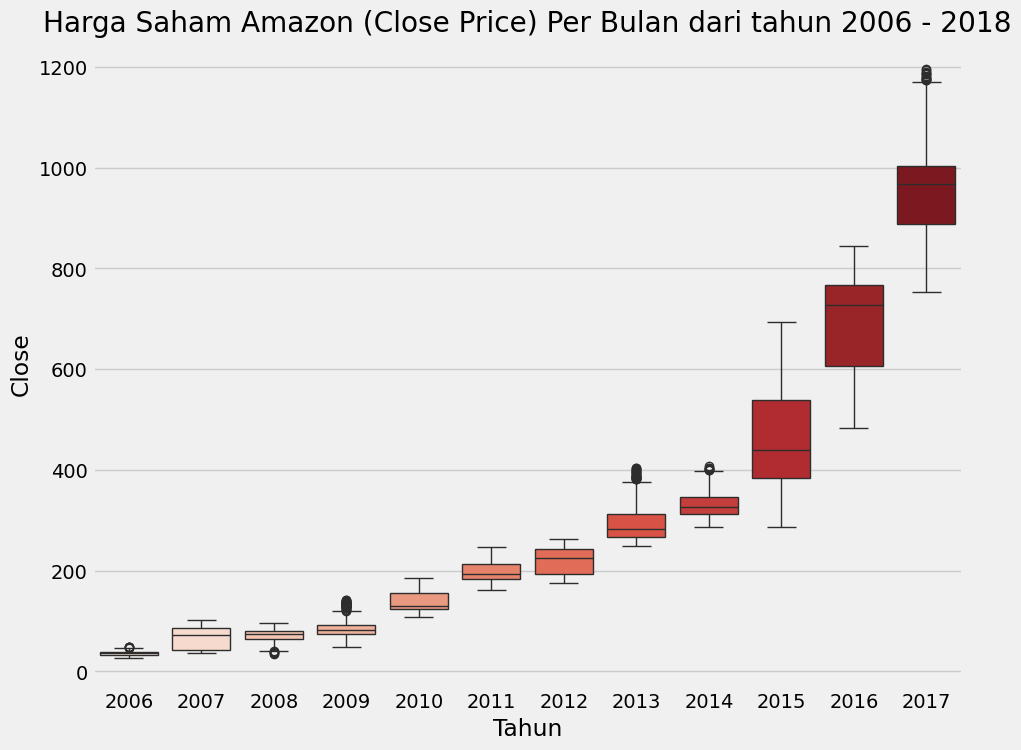

In [ ]:
# visualisasi plot (Tahun)
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='Tahun', y='Close', palette='Reds')
ax.set_title('Harga Saham Amazon (Close Price) Per Bulan dari tahun 2006 - 2018')

# Interpretasi EDA

Dari data diatas tren data memperlihatkan pola seasonality sehingga data perlu dilakukan transformasi.

Selain itu, pada beberapa fitur yang telah dibuat menunjukkan adanya pencilan yang berada di atas nilai maksimum.
Hal ini memberikan informasi terdapat harga (close) yang melambung tinggi di saat periode atau waktu tertentu, sehingga pada waktu selanjutnya harga (close) meningkat di kemudian hari mengikuti pola *Seasonality*.

# SPLIT Train dan Test Data

# Visualisasi Data train dan test

In [ ]:
# Import Dataset
df= pd.read_csv("/content/AMZN_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date']) #import dataset based on your directory

df = df.drop(['Open', 'High', 'Low', 'Volume', 'Name'], axis=1)

In [ ]:
train = df.loc[df.index < '2016-12-31']
test  = df.loc[df.index > '2016-01-01']

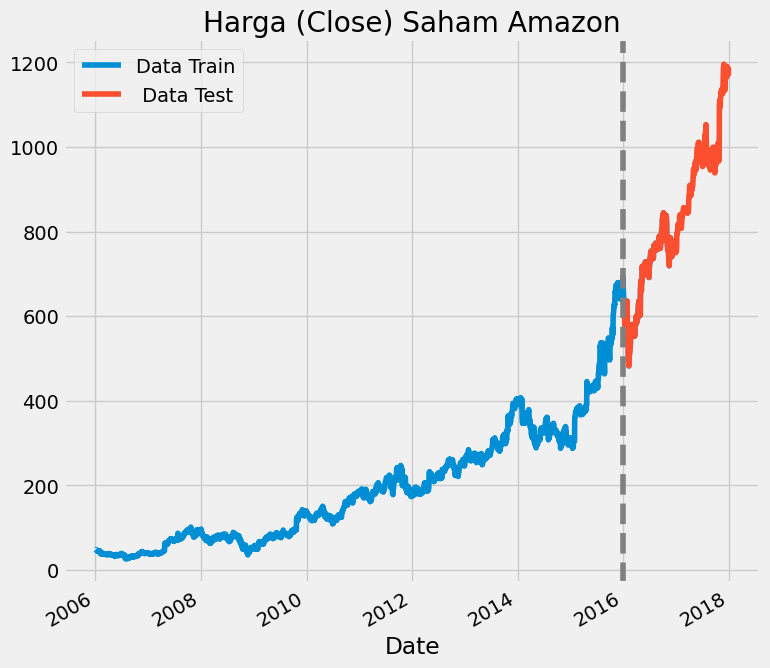

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
train.plot(ax=ax, label = 'Data Training')
test.plot(ax=ax, label = 'Data Test', title = 'Harga (Close) Saham Amazon')
ax.axvline('01-01-2016', color = 'grey', ls = '--')
ax.legend(['Data Train', ' Data Test'])
plt.show()

In [ ]:
# Import Dataset
dataset = pd.read_csv("/content/AMZN_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date']) #import dataset based on your directory
training_set = dataset[:'2015'].iloc[:,3].values.reshape(-1,1)
test_set = dataset['2016':].iloc[:,3].values.reshape(-1,1)

In [ ]:
training_set.shape

(2516, 1)

# Transformasi Data

Karena data yang kita gunakan memiliki tipe seasonality, maka kita dapat melakukan transformasi.
Pada kali ini, kita melakukan transformasi data dengan teknik normalisasi data atau dikenal dengan **MinMaxScaler**.

In [ ]:
# transformasi skala (MinMaxScaler)
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# memeriksa ukuran training yang distandarisasi
training_set_scaled.shape

(2516, 1)

# **01 RNN dan LSTM**

## Long Short Term Memory(LSTM), RNN dan GRU
RNN dibangun dengan loop yang memungkinkan informasi dari langkah sebelumnya diteruskan ke langkah berikutnya.

LSTM merupakan pengembangan dari RNN yang mengatasi masalah "vanishing gradient.

Jaringan Saraf Rekursif (RNN) dan Long Short Term Memory (LSTM) memang sangat powerful untuk menangani data deret waktu seperti timeseries.

LSTM dapat digunakan untuk memprediksi nilai saham di masa depan berdasarkan data harga historis.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

<img src="https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.">

Source: [Medium](https://codeburst.io/generating-text-using-an-lstm-network-no-libraries-2dff88a3968)

The best LSTM explanation on internet: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

Refer above link for deeper insights.

## Komponen LSTM

Komponen pada LSTM adalah
* Forget Gate “f” (neural network (NN) dengan sigmoid)
* Candidate layer “C"(NN dengan Tanh)
* Input Gate “I” (NN dengan sigmoid)
* Output Gate “O”(NN denga sigmoid)
* Hidden state “H” (vector)
* Memory state “C” (vector)



# Pra-Prediksi

# *Menyusun Array pada Data Training*

In [ ]:
# Menyusun struktur data train
X_train = []
y_train = []
for i in range(60,training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

# Mengubah pada bentuk Array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Bentuk ulang X_train agar model efisien
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
y_train.shape

(2456,)

In [ ]:
X_train.shape

(2456, 60, 1)

# Membangun Arsitektur LSTM dan Fitting Model LSTM

In [ ]:
# Model Sequential
model = Sequential()
# Layer LSTM pertama dengan Dropout regulerisasi
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
# Layer LSTM kedua dengan Dropout regulerisasi
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Layer LSTM ketiga dengan Dropout regulerisasi
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Layer LSTM keempat
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# Output Layer
model.add(Dense(units=1))
# gabungan model
model.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting pada data train
model.fit(X_train,y_train,epochs=50,batch_size=24)

Epoch 1/50
103/103 [==============================] - 19s 107ms/step - loss: 0.0077
Epoch 2/50
103/103 [==============================] - 11s 105ms/step - loss: 0.0034
Epoch 3/50
103/103 [==============================] - 11s 107ms/step - loss: 0.0026
Epoch 4/50
103/103 [==============================] - 11s 105ms/step - loss: 0.0024
Epoch 5/50
103/103 [==============================] - 11s 105ms/step - loss: 0.0021
Epoch 6/50
103/103 [==============================] - 10s 96ms/step - loss: 0.0019
Epoch 7/50
103/103 [==============================] - 11s 107ms/step - loss: 0.0018
Epoch 8/50
103/103 [==============================] - 11s 105ms/step - loss: 0.0015
Epoch 9/50
103/103 [==============================] - 11s 105ms/step - loss: 0.0016
Epoch 10/50
103/103 [==============================] - 11s 106ms/step - loss: 0.0016
Epoch 11/50
103/103 [==============================] - 11s 105ms/step - loss: 0.0013
Epoch 12/50
103/103 [==============================] - 11s 106ms/step - los

In [ ]:
# selanjutnya melakukan persiapan df untuk training dan testing dataset
dataset_total = pd.concat((dataset["Close"][:'2015'],dataset["Close"]['2016':]),axis=0)
test = dataset_total[len(dataset_total)-len(test_set) - 60:].values
test = test.reshape(-1,1)


#Transform the inputs
test = sc.transform(test)

In [ ]:
test.shape

(563, 1)

In [ ]:
# mempersiapkan X_test dan harga yang akan diprediksi ke depan
X_test = []
for i in range(60,test.shape[0]):
    X_test.append(test[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


# Prediksi
predict_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predict_stock_price)

16/16 [==============================] - 3s 44ms/step


In [ ]:
dates = dataset.index[-1*test.shape[0]+60:]

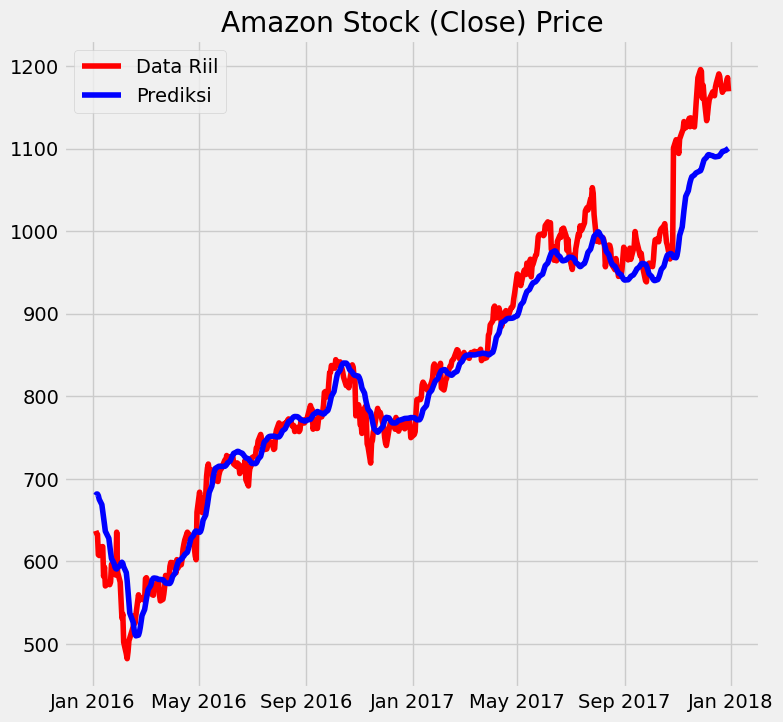

In [ ]:
# Visualisasi hasil prediksi
prediction_plot(test_set, predicted_stock_price)

Jika dilihat pada plot, pada periode awal, nilai prediksi mendekati dan bahkan bersinggungan dengan nilai aslinya (X_test), namun pada waktu waktu selanjutnya justru nilai prediksi sedikit menyimpang di bawah nilai asli (X_test) seta mulai menjauh dari nilai aslinya.

# Evaluasi Skor RMSE model LSTM

In [ ]:
# Evaluasi Model LSTM (RMSE)
rmse_eval(test_set, predicted_stock_price)

The root mean squared error is 37.27156383956756.


# **02 Gated Recurrent Unit (GRU)**

GRU merupakan algoritma dari turunan LSTM yang menggabungkan antara *input gate* dan *forget gate*


Komputasi GRU lebih sederhana dibandingkan dengan LSTM, tetapi dapat menandingi akurasi dari LSTM dan cukup efektif dalam mengurangi permasalahan *vanishing gradient*

# **Pemodelan dengan GRU**

In [ ]:
# Arsitektur GRU
LSTM_GRU = Sequential()
# Layer GRU pertama dengan Dropout regularisation
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Layer GRU kedua
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Layer GRU ketiga
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Layer GRU keempat
LSTM_GRU.add(GRU(units=50, activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Output Layer
LSTM_GRU.add(Dense(units=1))
# Menyusun RNN
LSTM_GRU.compile(optimizer=SGD(lr=0.01, momentum=0.0, nesterov=False, weight_decay=None, clipnorm=None, clipvalue=None, global_clipnorm=None, use_ema=False,
                               ema_momentum=0.99, ema_overwrite_frequency=None, jit_compile=True, name='SGD'),loss='mean_squared_error')
# Fitting Training set
LSTM_GRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
17/17 [==============================] - 14s 256ms/step - loss: 0.0491
Epoch 2/50
17/17 [==============================] - 4s 217ms/step - loss: 0.0336
Epoch 3/50
17/17 [==============================] - 4s 224ms/step - loss: 0.0321
Epoch 4/50
17/17 [==============================] - 4s 253ms/step - loss: 0.0304
Epoch 5/50
17/17 [==============================] - 3s 202ms/step - loss: 0.0287
Epoch 6/50
17/17 [==============================] - 4s 206ms/step - loss: 0.0271
Epoch 7/50
17/17 [==============================] - 4s 263ms/step - loss: 0.0250
Epoch 8/50
17/17 [==============================] - 4s 216ms/step - loss: 0.0231
Epoch 9/50
17/17 [==============================] - 4s 224ms/step - loss: 0.0216
Epoch 10/50
17/17 [==============================] - 4s 259ms/step - loss: 0.0201
Epoch 11/50
17/17 [==============================] - 4s 211ms/step - loss: 0.0185
Epoch 12/50
17/17 [==============================] - 4s 226ms/step - loss: 0.0171
Epoch 13/50
17/17 [=====

pada versi ini menggunakan density GRU network sebanyak 50 unit.

# Prediksi Harga pada data test

In [ ]:
# Mempersiapkan X_test untuk memprediksi
# Preparing X_test and predicting the prices of the stock's that you choose
X_test = []
for i in range(60,test.shape[0]):
    X_test.append(test[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = LSTM_GRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

16/16 [==============================] - 2s 29ms/step


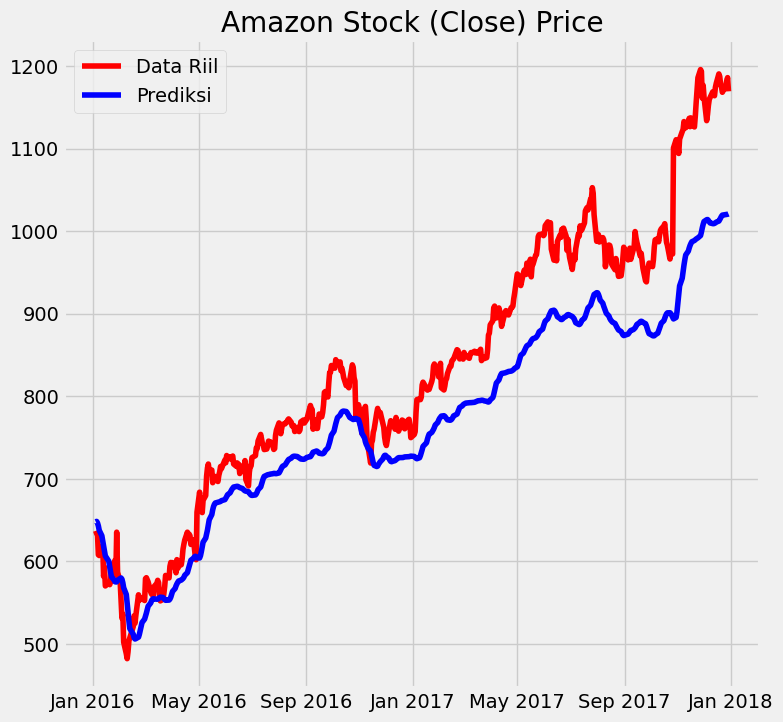

In [ ]:
# Memvisualisasikan hasil prediksi dengan model GRU
prediction_plot(test_set, GRU_predicted_stock_price)

# Evaluasi Skor RMSE model GRU

In [ ]:
# Evaluasi model GRU dengan nilai RMSE
rmse_eval(test_set, GRU_predicted_stock_price)

The root mean squared error is 78.87188147416059.


# **Interpretasi**

Nilai **RMSE dari LSTM** sebesar *37.27* sedangkan **RMSE dari GRU** sebesar *78.87*.

Jadi, kita dapat menyimpulkan bahwa model **GRU** memiliki **performa yang tidak lebih baik** daripada ***LSTM pada data time series ini***. Dengan menerapkan kedua model ini pada data time series lain, mungkin memberikan hasil yang berbeda dan lebih baik.

Kedua model diatas merupakan salah satu dari model *Deep Learning* lalu bagaimana shallow learning ???

Apakah akan memberikan performa yang lebih baik ??
Oleh karena itu, dapat kita bandingkan dengan salah satu saja model *Shallow Learning* yaitu XGboost.

# **03 Timeseries dengan XGBoost**

# Import Modul

In [ ]:
import xgboost as xgb

Setting data train dan test

In [ ]:
# Import Dataset
data = pd.read_csv('/content/AMZN_2006-01-01_to_2018-01-01.csv')
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)

In [ ]:
data = data.drop(['Open', 'High', 'Low', 'Volume', 'Name'], axis=1)

In [ ]:
# Membuat fitur timeseries
def fitur(data):
  data = data.copy()
  data['Hari per Minggu'] = data.index.dayofweek
  data['Quartal'] = data.index.quarter
  data['Bulan'] = data.index.month
  data['Tahun'] = data.index.year
  data['Hari'] = data.index.dayofyear
  data['Hari per Bulan'] = data.index.day
  data['Minggu per Tahun'] = data.index.isocalendar().week
  return(data)

data = fitur(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3019 non-null   float64
 1   Hari per Minggu   3019 non-null   int64  
 2   Quartal           3019 non-null   int64  
 3   Bulan             3019 non-null   int64  
 4   Tahun             3019 non-null   int64  
 5   Hari              3019 non-null   int64  
 6   Hari per Bulan    3019 non-null   int64  
 7   Minggu per Tahun  3019 non-null   UInt32 
dtypes: UInt32(1), float64(1), int64(6)
memory usage: 203.4 KB


# Menyusun data train dan test

In [ ]:
train = data.loc[data.index < '01-01-2016']
test = data.loc[data.index >= '01-01-2016']

In [ ]:
train = fitur(train)
test = fitur(test)

In [ ]:
# Menyusun ulang fitur dan target pada train dan test pada

fitur = ['Hari per Minggu', 'Quartal', 'Bulan', 'Tahun', 'Hari', 'Hari per Bulan',
         'Minggu per Tahun']
target = 'Close'

X_train = train[fitur]
y_train = train[target]

X_test = test[fitur]
y_test = test[target]

# Bangun Model XGBoost

In [ ]:
reg = xgb.XGBRegressor(base=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

Menetapkan nilai tunning pada :
*   base = 0.5
*   n_estimatotr = 1000
*   early_stopping_rounds=50
*   max_depth = 3
*   learning rate = 0.01









In [ ]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:140.02613	validation_1-rmse:659.59457
[100]	validation_0-rmse:57.58172	validation_1-rmse:483.18572
[200]	validation_0-rmse:29.23797	validation_1-rmse:419.59414


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:10:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:10:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "base" } are not used.

  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:20.24375	validation_1-rmse:395.81559
[400]	validation_0-rmse:17.70942	validation_1-rmse:388.16778
[500]	validation_0-rmse:16.93945	validation_1-rmse:386.57443
[600]	validation_0-rmse:16.07946	validation_1-rmse:385.79782
[700]	validation_0-rmse:14.83355	validation_1-rmse:385.41804
[800]	validation_0-rmse:13.55762	validation_1-rmse:385.12889
[900]	validation_0-rmse:12.79063	validation_1-rmse:385.02456
[999]	validation_0-rmse:11.99946	validation_1-rmse:385.00346


XGBRegressor(base=0.5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, ...)

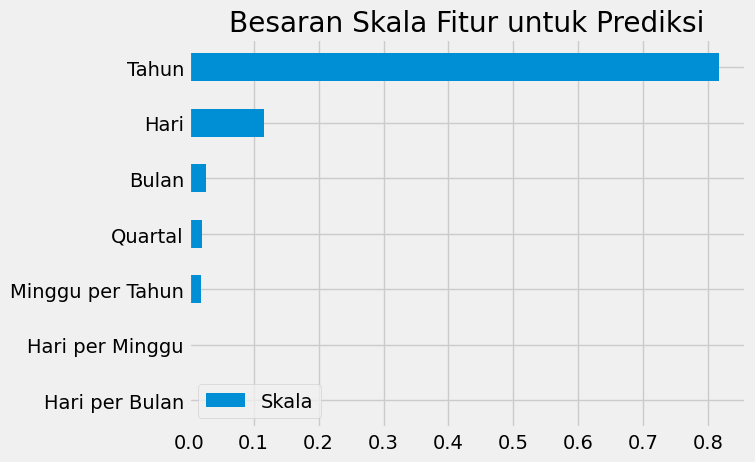

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['Skala'])
fi.sort_values('Skala').plot(kind='barh', title='Besaran Skala Fitur untuk Prediksi')
plt.show()

# Prediksi Harga pada data test

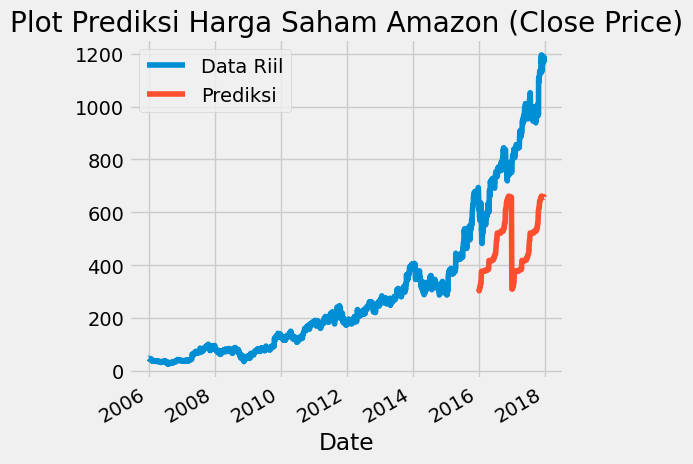

In [ ]:
test['Prediksi'] = reg.predict(X_test)
df = df.merge(test[['Prediksi']], how='left', left_index=True, right_index=True)
ax = df[['Close']].plot(figsize=(5, 5))
df['Prediksi'].plot(ax=ax, style='-')
plt.legend(['Data Riil', 'Prediksi'])
ax.set_title('Plot Prediksi Harga Saham Amazon (Close Price)')
plt.show()

# Evaluasi Skor RMSE

In [ ]:
skor = np.sqrt(mean_squared_error(test['Close'], test['Prediksi']))
print(f'Skor RMSE pada data Test {skor:0.2f}')

Skor RMSE pada data Test 384.98


In [ ]:
test['error'] = np.abs(test[target] - test['Prediksi'])
test.groupby(['Tahun'])['error'].mean().sort_values(ascending=False).head(10)

Tahun
2017    491.048128
2016    222.231113
Name: error, dtype: float64

Pada model Multivariat XGBoost timeseries dapat ditingkatkan kinerja modelnya dengan menambahkan lagi beberapa fitur, namun, hanya fitur tahun yang memberikan hasil yang signifikan paling besar dibandingkan fitur lainnya.
Selain itu, dengan bereksperimen pada nilai-nilai hyperparameter bisa jadi meningkatkan performa XGBoost.  

# **Kesimpulan**

Berdasarkan hasil yang ditemukan, bahwa Deep Learning jauh memberikan hasil prediksi dengan nilai RMSE yang jauh lebih rendah dibandingkan dengan model XGBoost (Shallow Learning).

Ini menunjukkan, pada yang dianalisis ini akan memberikan error yang rendah apabila diterapkan Deep Learning berdasarkan model LSTM.